# predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science in an attempt build a machine learning model capalbe of predicting whether or not someone has heart disease based on medical attributes


we are going to take the following approach:

1.Problem definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

## 1.problem defination
> Given clinical parameters about a patient, can we predict wether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI machine learning repository.
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/



there is also a version of it available on the Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## 3.Evaluation

>If we can reach 95% accuracy at the predicting wether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4.Features

This is wheare you'll get different information about each of the  features in your data.

 **create data dictionary**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* age


# preparing the tools 

We are going to use pandas, Matplotlib,Numpy,seaborn,scikit-learn for data analysis and manipulation. 

In [72]:
## import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# we want our plot to apper inside the note book 

%matplotlib inline 

# models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
## Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

# Load data

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add,change or remove features to get more out of your data?

In [7]:
df.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Let's find out how many of each class there

In [9]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

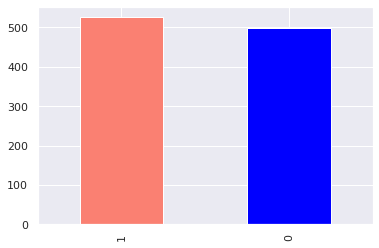

In [10]:
df["target"].value_counts().plot(kind="bar",color=["salmon", "blue"])

In [11]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Finding missing values

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease Frequency according to sex

In [14]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

# compare target column with sex colunm

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


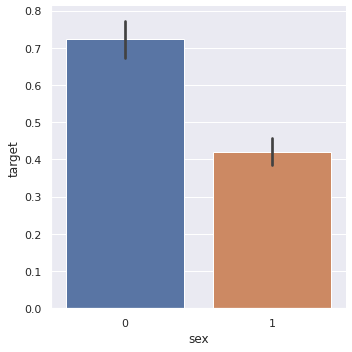

In [16]:
sns.catplot(data=df, kind="bar", x="sex", y="target")

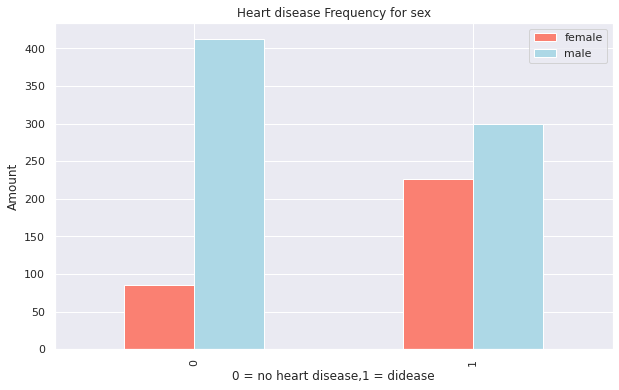

In [17]:
## creating a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart disease Frequency for sex")
plt.xlabel("0 = no heart disease,1 = didease")
plt.ylabel("Amount")
plt.legend(["female","male"])

# checking the distribution of the age column with a histogram


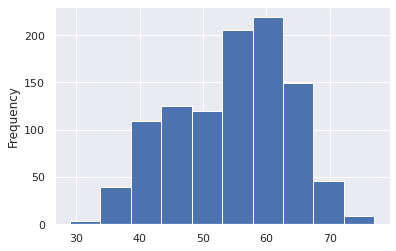

In [18]:
df.age.plot.hist();

# Heart disease frequency per chest pain Type 
*  cp: chest pain type
0. Value 1: typical angina
1. Value 2: atypical angina
2. Value 3: non-anginal pain
3. Value 4: asymptomatic

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


# Making the crosstab more visual

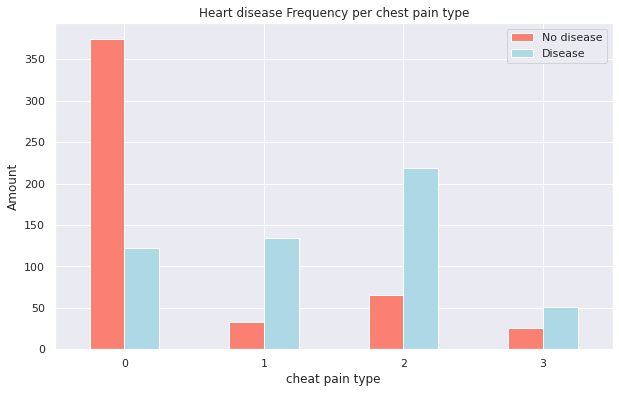

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

## Adding some information
plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("cheat pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Make a Correlation matrix

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# Making a correlation matrix [Heat map]  

<AxesSubplot:>

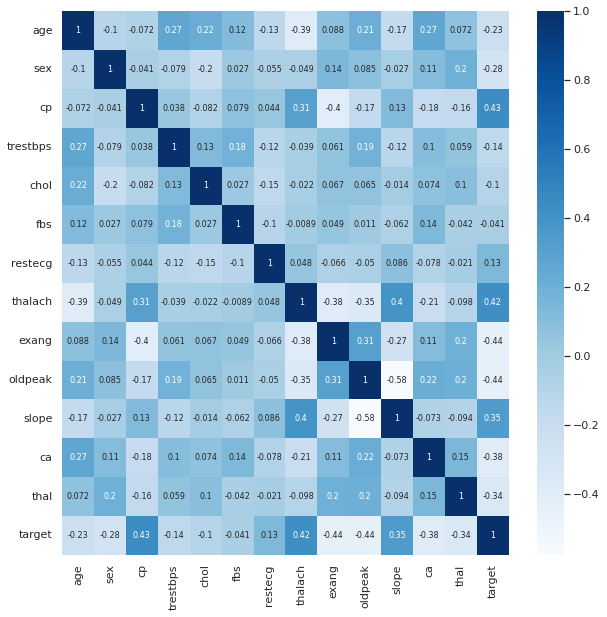

In [23]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True,annot_kws={'size':8},cmap='Blues')

# 5.Modelling

In [24]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [25]:
# split the data into x and y
x = df.drop("target",axis=1)

y = df["target"]

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [28]:
#split data into train and test sets
np.random.seed(42)

#split the data in to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [30]:
y_train,len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

In [31]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [32]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


# Now we've got our data split into train and test sets,it's time to build a machine learning model

we'll train it(find the patterns)on the train set.

And we'll test it(use the patterns) on the test set 

# we're going to try 3 different machine learning models 
1. K- Nearest Neighbours Classifier
2. Logistic Regression
3. Random Forest classifier

In [34]:
#put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "kNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}

#creat a function to fit and score models
def fit_and_score(models, x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different scikit_learn machine learning models
    x_train: train data (no label)
    x_test: test data(no label)
    y_train:training labels
    y_test: testing labels
    """
    #set random seed
    np.random.seed(42)

    #Make a dictionary to keep model score
    model_scores = {}
    # Loop through model
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.7853658536585366,
 'kNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'SVC': 0.6829268292682927}

# Model comparison

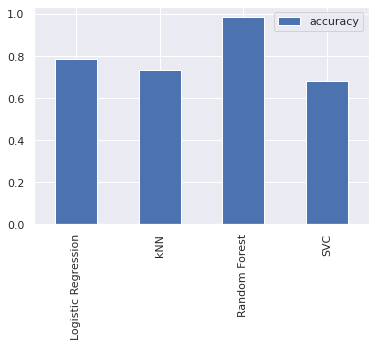

In [36]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.
what should do?

Let's look at the following:
* Hyperparameter tuning 
* feature importance
* confusion matrix
* cross-validation
* precision
* Recall
* F1 score
* classification report
* ROC curve
* Area under the curve(AUC)

# Hyperparameter tuning

In [37]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of differnt values for n_neighbors
neighbors = range(1,21)

# setup = KNN instance
Knn = KNeighborsClassifier()

# loop through different n neighbors
for i in neighbors:
    Knn.set_params(n_neighbors=i)
    
    # fit the algorithms
    Knn.fit(x_train,y_train)
    
    #update the training score list
    train_scores.append(Knn.score(x_train,y_train))
    
    # update the testing scores list
    test_scores.append(Knn.score(x_test,y_test))

In [38]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

In [39]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

Maximum KNN score on the test data: 98.54%


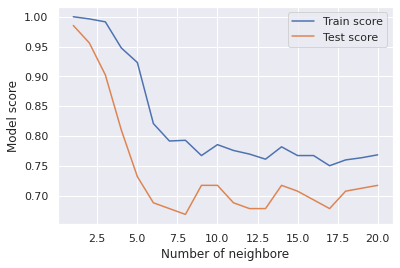

In [40]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbore")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with the RandomizedSearchCV 
we're going to tune:

* LogisticRegression 
* RandomForestClassifier

In [41]:
## create a hyperparameter grid For LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestclassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Now we've tune LogesticRegression()

In [42]:
# Tune LogisticRegression
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [44]:
rs_log_reg.score(x_test,y_test)

0.7853658536585366

# Now we've tuned LogesticRegression(), let's do the same for Randomforestclassifier()......

In [45]:
# setup random seed
np.random .seed(42)

# setup random forest hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#Fit random hyperparameter search model foe randimForestclassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
# Find the the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [47]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.926829268292683

# Hyperparameter tuning with the GridSearchCV
    
since RandomForestClassifier model provides the best scores so far,
we'll try and improve them again using GridsearchCV

In [49]:
# create a hyperparameter grid for RandomForestclassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# setup random seed
np.random .seed(42)

# setup random forest hyperparameter search for RandomForestClassifier
gs_rf= GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid,
                    cv=5,
                    n_jobs=20,
                    verbose=True)

#Fit random hyperparameter search model for randomForestclassifier()
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=20,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [50]:
gs_rf.score(x_test,y_test)

0.9853658536585366

In [51]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* confusion matrix
* classfication report
* precision
* recall
* F1-score

...and it would be great if cross-validation was used where possible


To make comparision and evaluate our trained model first we need to make predictions.


In [67]:
## Make predictions with tuned models
y_preds = rs_rf.predict(x_test)


In [68]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [69]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

# Plot ROC curve and calculate and calculate AUC metrics
* ROC curve and AUC matrics of Grid searchCV of RandonForestClassifier

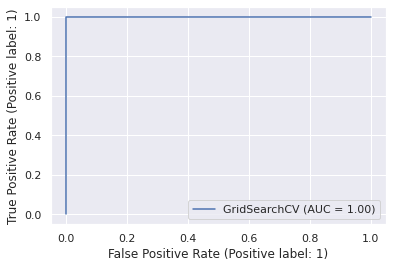

In [73]:
plot_roc_curve(gs_rf,x_test,y_test)

# Plot ROC curve and calculate and calculate AUC metrics¶
* ROC curve and AUC matrics of RandomizedSearchCV  of RandomForestClassifier

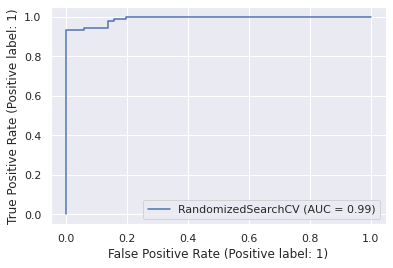

In [74]:
plot_roc_curve(rs_rf,x_test,y_test)

In [75]:
## confusion matrix
print(confusion_matrix(y_test,y_preds))

[[93  9]
 [ 6 97]]


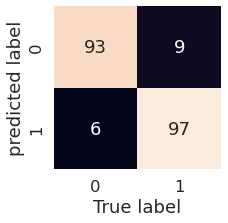

In [76]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    """
    plot a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
   
    
plot_conf_mat(y_test,y_preds)


# Now lets get a classification report as well as cross-validation precision and f1-score

In [77]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.92      0.94      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



# Building prediction system for GridsearchCV and RandomizedSearchCV  of RandomForestClassifier model

In [78]:
gs_rf.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

array([0])

In [79]:
rs_rf.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

array([0])

# 6. Experimentation

If you haven't hit your evaluation metric yet...ask yourself....

* could you collect more data?
* could you try a better model? Like CatBoost or XGBoost?
* could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with other?
      